In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [0]:
from google.colab import files
files.upload()

Output hidden; open in https://colab.research.google.com to view.

In [0]:
data = pd.read_csv("nndb_flat.csv")

In [0]:
data.head

<bound method NDFrame.head of          ID                       FoodGroup  ... Selenium_USRDA Zinc_USRDA
0      1001          Dairy and Egg Products  ...       0.018182   0.008182
1      1002          Dairy and Egg Products  ...       0.018182   0.004545
2      1003          Dairy and Egg Products  ...       0.000000   0.000909
3      1004          Dairy and Egg Products  ...       0.263636   0.241818
4      1005          Dairy and Egg Products  ...       0.263636   0.236364
...     ...                             ...  ...            ...        ...
8613  83110  Finfish and Shellfish Products  ...       1.334545   0.100000
8614  90240  Finfish and Shellfish Products  ...       0.394545   0.140909
8615  90480                          Sweets  ...       0.012727   0.017273
8616  90560  Finfish and Shellfish Products  ...       0.498182   0.090909
8617  93600  Finfish and Shellfish Products  ...       0.305455   0.090909

[8618 rows x 45 columns]>

In [0]:
data.shape

(8618, 45)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8618 entries, 0 to 8617
Data columns (total 29 columns):
ID                8618 non-null int64
FoodGroup         8618 non-null object
ShortDescrip      8618 non-null object
Descrip           8618 non-null object
CommonName        1063 non-null object
MfgName           1560 non-null object
ScientificName    732 non-null object
Energy_kcal       8618 non-null float64
Protein_g         8618 non-null float64
Carb_g            8618 non-null float64
Sugar_g           8618 non-null float64
Fiber_g           8618 non-null float64
VitA_mcg          8618 non-null float64
VitB6_mg          8618 non-null float64
VitB12_mcg        8618 non-null float64
VitC_mg           8618 non-null float64
VitE_mg           8618 non-null float64
Folate_mcg        8618 non-null float64
Niacin_mg         8618 non-null float64
Riboflavin_mg     8618 non-null float64
Thiamin_mg        8618 non-null float64
Calcium_mg        8618 non-null float64
Copper_mcg        8618

In [0]:
data2=data.iloc[:,7:30]

In [28]:
data2.corr()

,Energy_kcal,Protein_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,VitE_mg,Folate_mcg,Niacin_mg,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg
Energy_kcal,1.000000,0.110302,0.487096,0.313151,0.197338,0.026329,0.121872,-0.012292,-0.033495,0.303701,0.145936,0.174991,0.155830,0.187439,0.123571,0.099513,0.195564,0.255880,0.037621,0.195181,0.056673,0.112766
Protein_g,0.110302,1.000000,-0.301974,-0.266170,-0.072777,0.026483,0.228485,0.245423,-0.066456,-0.029481,0.008939,0.376939,0.202480,0.098360,0.046888,0.158900,0.126375,0.218611,0.039742,0.444608,0.378369,0.416315
Carb_g,0.487096,-0.301974,1.000000,0.615344,0.458192,0.001871,0.195571,-0.094636,0.076745,0.070298,0.325170,0.173285,0.232408,0.281809,0.189106,0.062106,0.350463,0.287207,0.055570,0.073180,-0.114600,-0.012187
Sugar_g,0.313151,-0.266170,0.615344,1.000000,0.115916,0.010143,0.088767,-0.050450,0.064152,0.066057,0.161257,0.034378,0.125225,0.097751,0.129540,-0.005837,0.117765,0.041308,0.010871,-0.049784,-0.123708,-0.021991
Fiber_g,0.197338,-0.072777,0.458192,0.115916,1.000000,0.005910,0.242804,-0.052045,0.081852,0.160154,0.249075,0.135257,0.157703,0.205211,0.232286,0.185044,0.386710,0.542038,0.101661,0.158422,-0.035897,0.085154
VitA_mcg,0.026329,0.026483,0.001871,0.010143,0.005910,1.000000,0.136605,0.581004,0.111279,0.044129,0.108517,0.151679,0.325709,0.052921,0.034822,0.569945,0.103475,0.024572,0.369993,0.055814,0.048043,0.070541
VitB6_mg,0.121872,0.228485,0.195571,0.088767,0.242804,0.136605,1.000000,0.264325,0.271305,0.286065,0.550087,0.714143,0.581678,0.417011,0.177268,0.116326,0.477905,0.293169,0.066876,0.213395,0.109004,0.447143
VitB12_mcg,-0.012292,0.245423,-0.094636,-0.050450,-0.052045,0.581004,0.264325,1.000000,0.007264,0.060618,0.158483,0.279033,0.436182,0.099601,0.011715,0.570642,0.177334,0.004124,0.242112,0.148774,0.215308,0.298136
VitC_mg,-0.033495,-0.066456,0.076745,0.064152,0.081852,0.111279,0.271305,0.007264,1.000000,0.066885,0.072797,0.209107,0.225928,0.056987,0.111825,0.025460,0.074417,0.115222,0.017942,0.012000,-0.035218,0.018476
VitE_mg,0.303701,-0.029481,0.070298,0.066057,0.160154,0.044129,0.286065,0.060618,0.066885,1.000000,0.183968,0.196972,0.157163,0.119313,0.109671,0.074504,0.156332,0.195205,0.103335,0.068251,0.015625,0.167093


In [0]:
corr = data.corr()

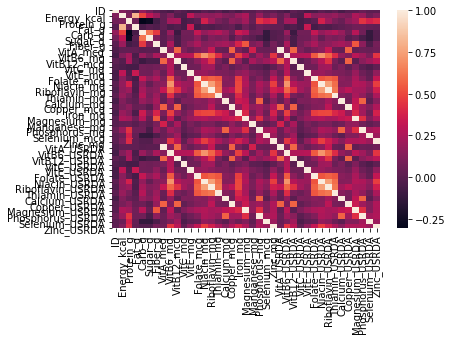

In [0]:
import seaborn as sns
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [0]:
"""# Create correlation matrix
corr_matrix = data.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.80
to_drop = [column for column in upper.columns if any(upper[column] > 0.80)]

# Drop features 
data.drop(to_drop, axis=1, inplace=True)

In [33]:
data2.shape

(8618, 22)

In [0]:
"""numeric_features = data.select_dtypes(include=[np.number])
numeric_features.dtypes

ID                 int64
Energy_kcal      float64
Protein_g        float64
Carb_g           float64
Sugar_g          float64
Fiber_g          float64
VitA_mcg         float64
VitB6_mg         float64
VitB12_mcg       float64
VitC_mg          float64
VitE_mg          float64
Folate_mcg       float64
Niacin_mg        float64
Riboflavin_mg    float64
Thiamin_mg       float64
Calcium_mg       float64
Copper_mcg       float64
Iron_mg          float64
Magnesium_mg     float64
Manganese_mg     float64
Phosphorus_mg    float64
Selenium_mcg     float64
Zinc_mg          float64
dtype: object

In [0]:
"""#DEALING WITH MISSING DATA  
data1 = data.select_dtypes(include= [np.number]).interpolate()

In [0]:
"""#check if all the columns have zero null value
sum(data1.isnull().sum() != 0)

0

In [34]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8618 entries, 0 to 8617
Data columns (total 22 columns):
Energy_kcal      8618 non-null float64
Protein_g        8618 non-null float64
Carb_g           8618 non-null float64
Sugar_g          8618 non-null float64
Fiber_g          8618 non-null float64
VitA_mcg         8618 non-null float64
VitB6_mg         8618 non-null float64
VitB12_mcg       8618 non-null float64
VitC_mg          8618 non-null float64
VitE_mg          8618 non-null float64
Folate_mcg       8618 non-null float64
Niacin_mg        8618 non-null float64
Riboflavin_mg    8618 non-null float64
Thiamin_mg       8618 non-null float64
Calcium_mg       8618 non-null float64
Copper_mcg       8618 non-null float64
Iron_mg          8618 non-null float64
Magnesium_mg     8618 non-null float64
Manganese_mg     8618 non-null float64
Phosphorus_mg    8618 non-null float64
Selenium_mcg     8618 non-null float64
Zinc_mg          8618 non-null float64
dtypes: float64(22)
memory usage: 1

In [0]:
#standardise data
df_TF= StandardScaler().fit_transform(data2)

In [36]:
round(df_TF.mean())

0.0

In [39]:
round(df_TF.std(),2)

1.0

In [0]:
fit = PCA()
# Conduct PCA
pca = fit.fit_transform(df_TF)

In [40]:
pca.shape

(8618, 22)

In [41]:
pca[:,:5]

array([[-1.28844719, -0.51327309,  0.86854517, -0.28491546, -1.29903029],
       [-1.2813462 , -0.51532021,  0.87797991, -0.29047787, -1.29497783],
       [-1.20562389, -0.72460343,  1.04031441, -0.42013122, -1.81512145],
       ...,
       [-0.7485379 , -3.38333   ,  1.99620945,  0.23070995, -1.87805839],
       [ 0.37363881,  0.67489832, -0.85233406, -1.9196809 ,  0.75902283],
       [-0.84277237,  1.12776827, -0.47842788, -0.20025738,  0.38652902]])

In [0]:
data5 = pd.DataFrame(pca[:,:5],columns = ["pc1",'pc2',"pc3","pc4","pc5"])

In [46]:
data5

,pc1,pc2,pc3,pc4,pc5
0,-1.288447,-0.513273,0.868545,-0.284915,-1.299030
1,-1.281346,-0.515320,0.877980,-0.290478,-1.294978
2,-1.205624,-0.724603,1.040314,-0.420131,-1.815121
3,0.192746,0.781089,-1.031028,-1.405713,0.204132
4,0.254434,0.778725,-1.160754,-1.972355,0.348064
...,...,...,...,...,...
8613,0.524716,2.175979,-0.210401,-0.696932,-1.033214
8614,-0.739938,1.277631,-0.857277,-0.712462,0.148425
8615,-0.748538,-3.383330,1.996209,0.230710,-1.878058
8616,0.373639,0.674898,-0.852334,-1.919681,0.759023


In [47]:
round(data5.corr(),2)

,pc1,pc2,pc3,pc4,pc5
pc1,1.0,0.0,0.0,-0.0,-0.0
pc2,0.0,1.0,0.0,0.0,0.0
pc3,0.0,0.0,1.0,0.0,-0.0
pc4,-0.0,0.0,0.0,1.0,-0.0
pc5,-0.0,0.0,-0.0,-0.0,1.0
